# Experiment 3: Depth Analysis of KAN on Specific Tasks

In this notebook, we reproduce and analyze **Kolmogorov–Arnold Networks (KAN)** for function approximation and scientific tasks. KAN, based on the Kolmogorov-Arnold Representation Theorem, demonstrates its strengths in approximating complex functions and especially the role depth plays.

**Objective**: The goal of this experiment is to study how depth impacts the performance of KAN in various regression tasks. We design and evaluate KANs with different depths on representative synthetic datasets, comparing them against original work.

## Step 1: Import Libraries and Set Up Environment

We start by importing the required libraries and setting up the experiment environment.

In [1]:
from tensorkan import *
from tensorkan.utils import create_dataset
import numpy as np
from tensorkan.MultKAN import MultKAN as KANTF
import tensorflow as tf
from tensorkan.KANLayer import KANLayer
import matplotlib.pyplot as plt

## Step 2: Initialization of Dataset & Reproducing Results with Optimal Depth

The target function in this experiment is defined as:

$$
f(x_1, x_2, x_3, x_4) = \exp\left( \frac{\sin\left( \pi \left( x_1^2 + x_2^2 \right) \right) + \sin\left( \pi \left( x_3^2 + x_4^2 \right) \right)}{2} \right)
$$

To conduct the experiment, the function values are calculated using the above formula.The resulting dataset consists of input-output pairs that are used for training and evaluation of the KAN models.

In this step, we implement and train a **three-layer KAN**, which has been identified as the most suitable depth for accurately approximating the target function. The training process is carried out, and the results, including loss values, are recorded.The three-layer KAN demonstrates a strong ability to approximate the function, achieving results close to those reported in the original work.



In [2]:
# initialize KAN with G=3
model = KANTF(width=[4, 2, 1, 1], grid=3, k=3, seed=1, noise_scale=1.0)

# create dataset
# f = lambda x: tf.math.exp(tf.math.sin(np.pi * x[:, 0:1]) + tf.math.square(x[:, 1:2]))
f = lambda x: tf.math.exp((tf.math.sin(np.pi*(x[:,0:1]**2+x[:,1:2]**2))+tf.math.sin(np.pi*(x[:,2:3]**2+x[:,3:4]**2)))/2)
dataset = create_dataset(f, n_var=4, train_num=5000)
model.fit(dataset, opt="LBFGS", steps=150, lamb=0.002, lamb_entropy=2., lr=0.0001);

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.18e-02 | test_loss: 1.18e-02 | reg: 1.04e+01 |: 100%|█| 150/150 [29:41<00:00, 11.88s

Saving model version 0.1


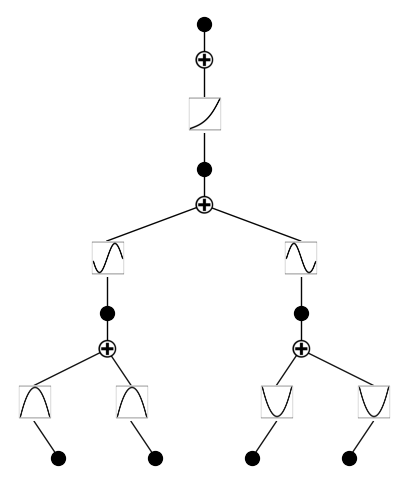

In [3]:
model.plot()

Saving model version 0.2


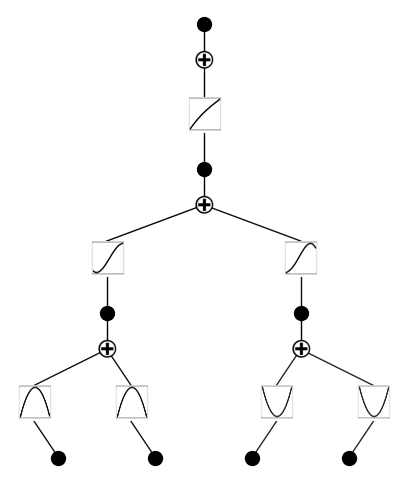

In [5]:
model = model.prune(edge_th=1e-2)
model.plot()

In [6]:
grids = [3,5,10,20,50]
#grids = [5]

train_rmse = []
test_rmse = []

for i in range(len(grids)):
    #model = KAN(width=[4,2,1,1], grid=grids[i], k=3, seed=0, device=device).initialize_from_another_model(model, dataset['train_input'])
    model = model.refine(grids[i])
    results = model.fit(dataset, opt="LBFGS", steps=50, stop_grid_update_step=20, lr=0.0001);
    train_rmse.append(results['train_loss'][-1].item())
    test_rmse.append(results['test_loss'][-1].item())

Saving model version 0.3



 train_loss: 5.62e-03 | test_loss: 6.36e-03 | reg: 1.08e+01 |: 100%|█| 50/50 [08:35<00:00, 10.30s/i

Saving model version 0.4
Saving model version 0.5



 train_loss: 4.41e-03 | test_loss: 4.95e-03 | reg: 1.09e+01 |: 100%|█| 50/50 [08:47<00:00, 10.56s/i

Saving model version 0.6
Saving model version 0.7



 train_loss: 1.64e-03 | test_loss: 1.70e-03 | reg: 1.09e+01 |: 100%|█| 50/50 [10:05<00:00, 12.12s/i

Saving model version 0.8
Saving model version 0.9



 train_loss: 3.10e-04 | test_loss: 3.33e-04 | reg: 1.09e+01 |: 100%|█| 50/50 [11:28<00:00, 13.77s/i

Saving model version 0.10
Saving model version 0.11


| train_loss: 1.49e-04 | test_loss: 1.53e-04 | reg: 1.09e+01 |: 100%|█| 50/50 [15:12<00:00, 18.24s/i

Saving model version 0.12


[0.005616949871182442, 0.004408389329910278, 0.0016414691926911473, 0.0003101778856944293, 0.00014895127969793975]
[0.00636464636772871, 0.004953475669026375, 0.0017012468306347728, 0.0003333869972266257, 0.0001529787841718644]


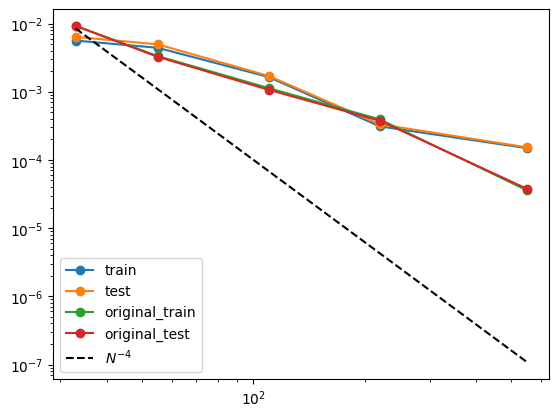

In [58]:
n_params = np.array([3,5,10,20,50]) * (4*2+2*1+1*1)
train_rmse = [0.005616949871182442, 0.004408389329910278, 0.0016414691926911473, 0.0003101778856944293, 0.00014895127969793975]
test_rmse = [0.00636464636772871, 0.004953475669026375, 0.0017012468306347728, 0.0003333869972266257, 0.0001529787841718644]
original_train_rmse = [0.009214929305016994, 0.0033308672718703747, 0.00112761405762285, 0.0003925061319023371, 3.601737262215465e-05]
original_test_rmse = [0.009230277501046658, 0.0032473765313625336, 0.0010660917032510042, 0.0003754299250431359, 3.784598084166646e-05]
plt.figure(dpi=100)
plt.plot(n_params, train_rmse, marker="o")
plt.plot(n_params, test_rmse, marker="o")
plt.plot(n_params, original_train_rmse, marker="o")
plt.plot(n_params, original_test_rmse, marker="o")
plt.plot(n_params, 10000*n_params**(-4.), color="black", ls="--")
plt.legend(['train', 'test', 'original_train', 'original_test', r'$N^{-4}$'], loc="lower left")
plt.xscale('log')
plt.yscale('log')
print(train_rmse)
print(test_rmse)
#[0.005616949871182442, 0.004408389329910278, 0.0016414691926911473, 0.0003101778856944293, 0.00014895127969793975]
#[0.00636464636772871, 0.004953475669026375, 0.0017012468306347728, 0.0003333869972266257, 0.0001529787841718644]

## Step 3: Results with Shallower KAN

To explore the limitations of network depth, we train a **two-layer KAN** on the same dataset. This shallower architecture struggles to approximate the target function effectively, leading to higher loss values compared to the three-layer KAN.

The experiment highlights the reduced expressiveness of shallow KANs, which fail to capture the compositional complexity of the target function.


In [10]:
# initialize KAN with G=3
model = KANTF(width=[4, 9, 1], grid=3, k=3, seed=0, noise_scale=1.0)

# create dataset
# f = lambda x: tf.math.exp(tf.math.sin(np.pi * x[:, 0:1]) + tf.math.square(x[:, 1:2]))
f = lambda x: tf.math.exp((tf.math.sin(np.pi*(x[:,0:1]**2+x[:,1:2]**2))+tf.math.sin(np.pi*(x[:,2:3]**2+x[:,3:4]**2)))/2)
dataset = create_dataset(f, n_var=4, train_num=5000)
model.fit(dataset, opt="LBFGS", steps=100, lamb=0.002, lamb_entropy=2., lr=0.0001);

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 5.90e-02 | test_loss: 6.01e-02 | reg: 1.26e+01 |: 100%|█| 100/100 [21:29<00:00, 12.90s

Saving model version 0.1


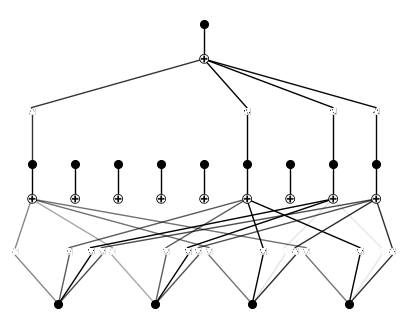

In [11]:
model.plot(beta=10)

In [12]:
grids = [3,5,10,20,50]
#grids = [5]

train_rmse = []
test_rmse = []

for i in range(len(grids)):
    #model = KAN(width=[4,2,1,1], grid=grids[i], k=3, seed=0, device=device).initialize_from_another_model(model, dataset['train_input'])
    model = model.refine(grids[i])
    results = model.fit(dataset, opt="LBFGS", steps=50, stop_grid_update_step=20, lr=0.0001);
    train_rmse.append(results['train_loss'][-1].item())
    test_rmse.append(results['test_loss'][-1].item())

Saving model version 0.2



 train_loss: 2.96e-02 | test_loss: 3.01e-02 | reg: 1.78e+01 |: 100%|█| 50/50 [08:30<00:00, 10.22s/i

Saving model version 0.3
Saving model version 0.4



 train_loss: 1.87e-02 | test_loss: 1.92e-02 | reg: 1.84e+01 |: 100%|█| 50/50 [09:22<00:00, 11.25s/i

Saving model version 0.5
Saving model version 0.6



 train_loss: 1.26e-02 | test_loss: 1.37e-02 | reg: 1.86e+01 |: 100%|█| 50/50 [09:57<00:00, 11.95s/i

Saving model version 0.7
Saving model version 0.8



 train_loss: 9.90e-03 | test_loss: 1.36e-02 | reg: 1.85e+01 |: 100%|█| 50/50 [10:09<00:00, 12.19s/i

Saving model version 0.9
Saving model version 0.10


| train_loss: 7.33e-03 | test_loss: 1.77e-02 | reg: 1.84e+01 |: 100%|█| 50/50 [13:27<00:00, 16.15s/i

Saving model version 0.11


[0.02963954024016857, 0.018739501014351845, 0.012565545737743378, 0.009904471226036549, 0.0073299226351082325]
[0.03009074553847313, 0.019241059198975563, 0.013728556223213673, 0.013586156070232391, 0.017686059698462486]


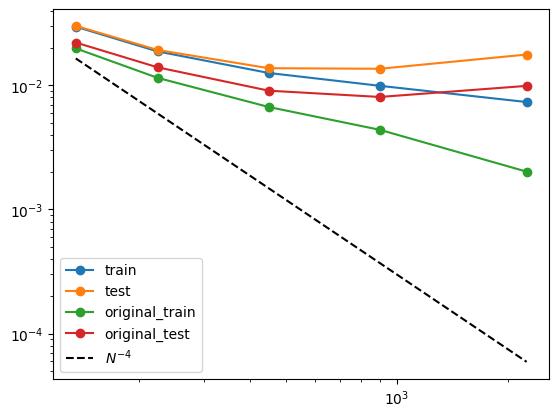

In [57]:
n_params = np.array([3,5,10,20,50]) * (4*9+9*1)
train_rmse = [0.02963954024016857, 0.018739501014351845, 0.012565545737743378, 0.009904471226036549, 0.0073299226351082325]
test_rmse = [0.03009074553847313, 0.019241059198975563, 0.013728556223213673, 0.013586156070232391, 0.017686059698462486]
original_train_rmse = [0.01983197219669819, 0.01147659495472908, 0.006687900051474571, 0.004380852449685335, 0.002016218611970544]
original_test_rmse = [0.022097894921898842, 0.013952379114925861, 0.009049860760569572, 0.008054238744080067, 0.00989140197634697]
plt.figure(dpi=100)
plt.plot(n_params, train_rmse, marker="o")
plt.plot(n_params, test_rmse, marker="o")
plt.plot(n_params, original_train_rmse, marker="o")
plt.plot(n_params, original_test_rmse, marker="o")
plt.plot(n_params, 300*n_params**(-2.), color="black", ls="--")
plt.legend(['train', 'test', 'original_train', 'original_test', r'$N^{-4}$'], loc="lower left")
plt.xscale('log')
plt.yscale('log')
print(train_rmse)
print(test_rmse)
# [0.02963954024016857, 0.018739501014351845, 0.012565545737743378, 0.009904471226036549, 0.0073299226351082325]
# [0.03009074553847313, 0.019241059198975563, 0.013728556223213673, 0.013586156070232391, 0.017686059698462486]

## Step 4: Comparison with the Original Work

The results of our experiments are compared to the benchmarks provided in the original work. Key observations include:
- The three-layer KAN closely reproduces the results from the original study, demonstrating its effectiveness.
- The two-layer KAN significantly underperforms, validating the importance of sufficient depth for accurate function approximation.


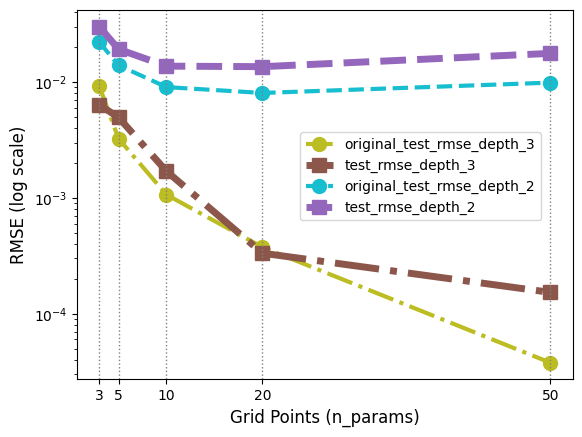

In [56]:
# def calculate_differences(list_a, list_b):
#     return [(np.abs(a - b) / a * 100) if a != 0 else 0 for a, b in zip(list_a, list_b)]

original_test_rmse_depth_3 = [0.009230277501046658, 0.0032473765313625336, 0.0010660917032510042, 0.0003754299250431359, 3.784598084166646e-05]
test_rmse_depth_3 = [0.00636464636772871, 0.004953475669026375, 0.0017012468306347728, 0.0003333869972266257, 0.0001529787841718644]
original_test_rmse_depth_2 = [0.022097894921898842, 0.013952379114925861, 0.009049860760569572, 0.008054238744080067, 0.00989140197634697]
test_rmse_depth_2 = [0.03009074553847313, 0.019241059198975563, 0.013728556223213673, 0.013586156070232391, 0.017686059698462486]

# diff_depth_3 = calculate_differences(original_test_rmse_depth_3, test_rmse_depth_3)
# diff_depth_2 = calculate_differences(original_test_rmse_depth_2, test_rmse_depth_2)

n_params = np.array([3,5,10,20,50])
plt.figure(dpi=100)
plt.plot(n_params, original_test_rmse_depth_3, linewidth=3, linestyle='-.', marker='o', markersize=10, color='tab:olive')
plt.plot(n_params, test_rmse_depth_3, linewidth=5, linestyle='-.', marker='s', markersize=10, color='tab:brown')
plt.plot(n_params, original_test_rmse_depth_2, linewidth=3, linestyle='--', marker='o', markersize=10, color='tab:cyan')
plt.plot(n_params, test_rmse_depth_2, linewidth=5, linestyle='--', marker='s', markersize=10, color='tab:purple')
plt.legend(['original_test_rmse_depth_3', 'test_rmse_depth_3', 
            'original_test_rmse_depth_2', 'test_rmse_depth_2'], 
           loc='upper left', bbox_to_anchor=(0.45, 0.67), borderaxespad=0., prop={'size': 10})
plt.xscale('linear')
plt.yscale('log')

plt.xlabel("Grid Points (n_params)", fontsize=12)
plt.ylabel("RMSE (log scale)", fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(n_params, labels=[str(i) for i in n_params], fontsize=10)
for x in n_params:
    plt.axvline(x=x, color='gray', linestyle=':', linewidth=1)
plt.show()
# print(diff_depth_3)
# print(diff_depth_2)

## Step 5: Analysis

1. **Impact of Depth**: The experiment confirms that increasing the depth of KAN enhances its ability to approximate complex functions. Shallower networks are less capable of capturing compositional structures, resulting in higher error even when it contains more "neurons".

2. **Reproducibility**: The results achieved with the three-layer KAN align well with the findings in the original work, demonstrating successful reproduction of key outcomes.

3. **Importance of Proper Depth Choice**: The failure of the two-layer KAN highlights the importance of Proper Depth Choice.



## **Conclusion**

This experiment successfully reproduces and analyzes the depth-dependent performance of KAN. The three-layer KAN achieves optimal results, while the two-layer KAN demonstrates the limitations of insufficient depth. The findings underscore the necessity of proper deeper architectures for accurately approximating complex functions.